In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [12]:
import os

path = '.\pic'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))
        
for f in files:
    print(f)

.\pic\M\敏珠1.jpg
.\pic\M\敏珠2.jpg
.\pic\M\敏珠3.jpg
.\pic\M\敏珠4.jpg
.\pic\M\敏珠5.jpg
.\pic\M\敏珠6.jpg
.\pic\M\敏珠7.jpg
.\pic\M\敏珠8.jpg
.\pic\M\敏珠9.jpg


In [13]:
import face_recognition
import cv2

159 28 76 111
147 45 113 78
181 30 99 113
162 27 145 44
237 35 92 180
133 45 113 65
168 28 76 121
181 40 108 113
164 25 72 116


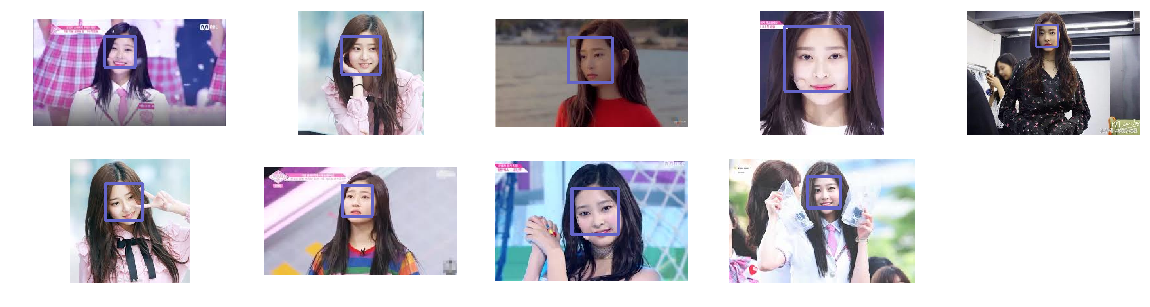

In [15]:

# 最後要記錄出的樣品向量(128 維度) 和標籤(明星名)
encodinglist = []
labels = []
# 一橫列畫幾個人
width = 5
# 總共幾個橫列
height = int(len(files) / width) + 1
# 整個大圖的size
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(files):
# Step1. 讀取檔案
    img = face_recognition.load_image_file(f)
# Step2. 把臉的降維向量算出, 用已經做好的cnn, [0] 第一張臉
    face_detect_and_encoding = face_recognition.face_encodings(img)
    #print(face_encoding[0])
# Step3. 抓出臉的方框, 我們這裡沒用到, 但如果你想畫框就會需要
# 這裡的face_locations 可以使用cnn(深度學習) 或者haar(固定特徵) 來得到
# 如果需要快速, 請使用haar, 如果需要更準確, 就使用cnn, 建議可以使用預設haar 即可
    if len(face_detect_and_encoding) <= 0:
        print("No faces found in the image!")
        continue
    else :
        face_encoding = face_detect_and_encoding[0]

    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
    
    #draw
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (100, 100, 200),thickness=3)
    print(str(right) + ' '+str(top) + ' '+str(bottom) + ' '+str(left))
# Step4. 把它加到我自己準備的list 裡
    encodinglist.append(face_encoding)
# Step5. 把檔名前面的人名split 出來
    name = os.path.split(f)[-1].split(".")[0]
# Step6. 把人名到我自己準備的list
    labels.append(name)
# 利用enumerate 得到的i 指定subplot
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)